#📌 Extracción

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

datos = pd.read_json(url)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [2]:
print('La cantidad de filas y columnas del DataFrame es:')
datos.shape

La cantidad de filas y columnas del DataFrame es:


(7267, 6)

In [3]:
print('\nInformación general del DataFrame:\n')
datos.info()


Información general del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
print('\nEl tipo de dato de cada columna del DataFrame inicial:\n')
datos.dtypes


El tipo de dato de cada columna del DataFrame inicial:



,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


###**Normalización del DataFrame**

In [5]:
df = pd.json_normalize(datos.to_dict(orient='records'))
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
print('\nInformación general del DataFrame Normalizado:\n')
df.info()


Información general del DataFrame Normalizado:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13 

In [7]:
print("\nValores ausentes por columna:")
print(df.isnull().sum())


Valores ausentes por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [8]:
print("Número de filas duplicadas:", df.duplicated().sum())

Número de filas duplicadas: 0


In [9]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [10]:
print("Valores únicos par columnas con menos de 10 valores:\n")
for column in df.columns:
    num_val_unicos = df[column].nunique()
    if num_val_unicos < 10:
        valores_unicos = df[column].unique()
        print(f"Columna: {column} ({num_val_unicos} valores únicos)")
        print(f"Valores: {valores_unicos}\n")

Valores únicos par columnas con menos de 10 valores:

Columna: Churn (3 valores únicos)
Valores: ['No' 'Yes' '']

Columna: customer.gender (2 valores únicos)
Valores: ['Female' 'Male']

Columna: customer.SeniorCitizen (2 valores únicos)
Valores: [0 1]

Columna: customer.Partner (2 valores únicos)
Valores: ['Yes' 'No']

Columna: customer.Dependents (2 valores únicos)
Valores: ['Yes' 'No']

Columna: phone.PhoneService (2 valores únicos)
Valores: ['Yes' 'No']

Columna: phone.MultipleLines (3 valores únicos)
Valores: ['No' 'Yes' 'No phone service']

Columna: internet.InternetService (3 valores únicos)
Valores: ['DSL' 'Fiber optic' 'No']

Columna: internet.OnlineSecurity (3 valores únicos)
Valores: ['No' 'Yes' 'No internet service']

Columna: internet.OnlineBackup (3 valores únicos)
Valores: ['Yes' 'No' 'No internet service']

Columna: internet.DeviceProtection (3 valores únicos)
Valores: ['No' 'Yes' 'No internet service']

Columna: internet.TechSupport (3 valores únicos)
Valores: ['Yes' 'N

###customerID

Tratar de simplificar el ID

In [11]:
df['customerID_clean'] = df['customerID'].str.replace(r'\D', '', regex=True)

In [12]:
df['customerID_clean'].is_unique

False

In [13]:
repetidos = df['customerID_clean'].value_counts()
repetidos = repetidos[repetidos > 1]
repetidos

,count
customerID_clean,
3096,5
3097,5
6734,5
1866,5
0621,5
...,...
3192,2
3186,2
3181,2


In [14]:
df[df['customerID_clean'].isin(repetidos.index)]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,customerID_clean
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,0013
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45,0013
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,0013
10,0017-DINOC,No,Male,0,No,No,54,No,No phone service,DSL,...,No,Yes,Yes,No,Two year,No,Credit card (automatic),45.20,2460.55,0017
11,0017-IUDMW,No,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.80,8456.75,0017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7254,9972-VAFJJ,No,Female,1,Yes,No,53,Yes,No,Fiber optic,...,Yes,Yes,Yes,No,One year,Yes,Electronic check,94.00,4871.45,9972
7256,9975-GPKZU,No,Male,0,Yes,Yes,46,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.75,856.5,9975
7257,9975-SKRNR,No,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.9,9975
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,9992


In [15]:
df.drop(columns='customerID_clean', inplace=True)

**No sirve sacarle las letrasl al ID para simplificarlo**

y utilizar sólo letras...

In [16]:
df['customerID_letras'] = df['customerID'].str.extract('([a-zA-Z]+)')

In [17]:
df['customerID_letras'].is_unique

False

In [18]:
df.drop(columns='customerID_letras', inplace=True)

tampoco sirvió con sólo letras. Trabajar con los ID originales

### Churn

In [19]:
#Eliminar registros de churn vacíos
df = df[df['Churn'] != '']
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


###Columna de Cargos Totales

In [20]:
import numpy as np

In [21]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [22]:
df['account.Charges.Total'] = df['account.Charges.Total'].replace(" ", 0.0)

In [23]:
df['account.Charges.Total'] = df['account.Charges.Total'].astype(float)
df['account.Charges.Total']

,account.Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


###Creación columna Cuentas_Diarias

In [24]:
df['Cargos_Diarios'] = df['account.Charges.Monthly'] / 30
print(df[['account.Charges.Monthly', 'Cargos_Diarios']])

      account.Charges.Monthly  Cargos_Diarios
0                       65.60        2.186667
1                       59.90        1.996667
2                       73.90        2.463333
3                       98.00        3.266667
4                       83.90        2.796667
...                       ...             ...
7262                    55.15        1.838333
7263                    85.10        2.836667
7264                    50.30        1.676667
7265                    67.85        2.261667
7266                    59.00        1.966667

[7043 rows x 2 columns]


###Estandarización t transformación de datos

In [25]:
# Valores por columna
for col in df.columns:
  print(f"valores únicos en la columna'{col}': {df[col].nunique()}")
  if df[col].nunique() < 10:
    print(df[col].unique())
    print('-' * 50)

valores únicos en la columna'customerID': 7043
valores únicos en la columna'Churn': 2
['No' 'Yes']
--------------------------------------------------
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No']
-

In [26]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [27]:
columnas_trans = [
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'account.PaperlessBilling'
]

mapeo_binario = {'Yes': 1 , 'No': 0}

for col in columnas_trans:
    df[col] = df[col].map(mapeo_binario)
    print(f"Valores para '{col}' después de la conversión:")
    print(df[col].value_counts())

Valores para 'customer.Partner' después de la conversión:
customer.Partner
0    3641
1    3402
Name: count, dtype: int64
Valores para 'customer.Dependents' después de la conversión:
customer.Dependents
0    4933
1    2110
Name: count, dtype: int64
Valores para 'phone.PhoneService' después de la conversión:
phone.PhoneService
1    6361
0     682
Name: count, dtype: int64
Valores para 'account.PaperlessBilling' después de la conversión:
account.PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64


In [28]:
nuevos_nombres_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Abandono',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Adulto_Mayor',
    'customer.Partner': 'Pareja',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'Antiguedad_Meses',
    'phone.PhoneService': 'Servicio_Telefonico',
    'phone.MultipleLines': 'Multiples_Lineas',
    'internet.InternetService': 'Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Copia_Seguridad_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Peliculas',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'Facturacion_Sin_Papel',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargos_Mensuales',
    'account.Charges.Total': 'Cargos_Totales'
}

df = df.rename(columns=nuevos_nombres_columnas)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7043 non-null   object 
 1   Abandono                7043 non-null   int64  
 2   Genero                  7043 non-null   object 
 3   Adulto_Mayor            7043 non-null   int64  
 4   Pareja                  7043 non-null   int64  
 5   Dependientes            7043 non-null   int64  
 6   Antiguedad_Meses        7043 non-null   int64  
 7   Servicio_Telefonico     7043 non-null   int64  
 8   Multiples_Lineas        7043 non-null   object 
 9   Servicio_Internet       7043 non-null   object 
 10  Seguridad_Online        7043 non-null   object 
 11  Copia_Seguridad_Online  7043 non-null   object 
 12  Proteccion_Dispositivo  7043 non-null   object 
 13  Soporte_Tecnico         7043 non-null   object 
 14  Streaming_TV            7043 non-null   objec

#📊 Carga y análisis

In [30]:
df

,ID_Cliente,Abandono,Genero,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


In [31]:
df.describe()

,Abandono,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefonico,Facturacion_Sin_Papel,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [32]:
# Count the occurrences of each category in 'Abandono'
churn_counts = df['Abandono'].value_counts()
churn_counts

,count
Abandono,
0,5174
1,1869


Gráfico de estilo donut "churn_donut.png" generado con éxito.


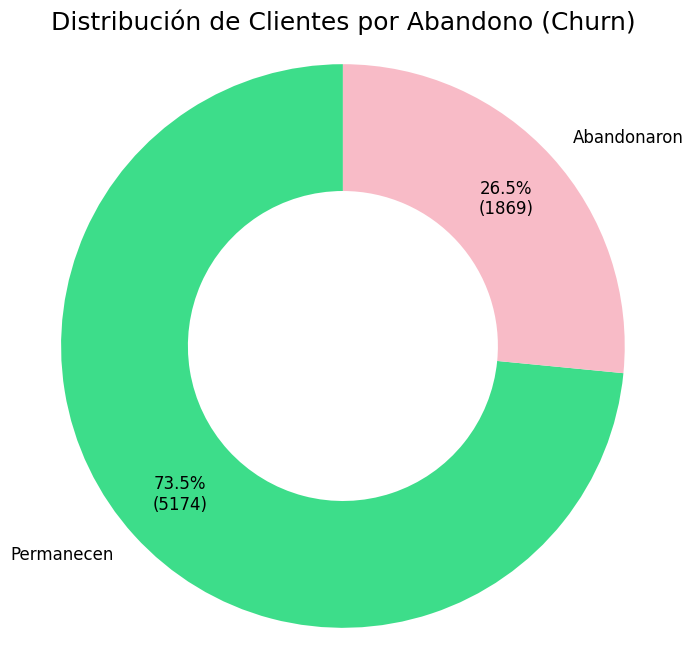

In [33]:
import matplotlib.pyplot as plt

etiquetas_churn = ['Permanecen', 'Abandonaron']
colores = ['#3DDD8A', '#F8BBC7']

sizes = [churn_counts.get(0, 0), churn_counts.get(1, 0)]

def autopct_format(pct):
    total = sum(sizes)
    val = int(round(pct*total/100.0))
    return '{:.1f}%\n({})'.format(pct, val)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=etiquetas_churn, colors=colores, autopct=autopct_format, startangle=90, textprops={'fontsize': 12},
        wedgeprops=dict(width=0.45), pctdistance=0.78)
plt.title('Distribución de Clientes por Abandono (Churn)', fontsize=18)
plt.axis('equal')
plt.savefig('churn_donut.png')
print('Gráfico de estilo donut "churn_donut.png" generado con éxito.')

In [34]:
import seaborn as sns

Gráfico de barras "abandono_por_genero.png" generado con éxito, con cantidades en las barras.


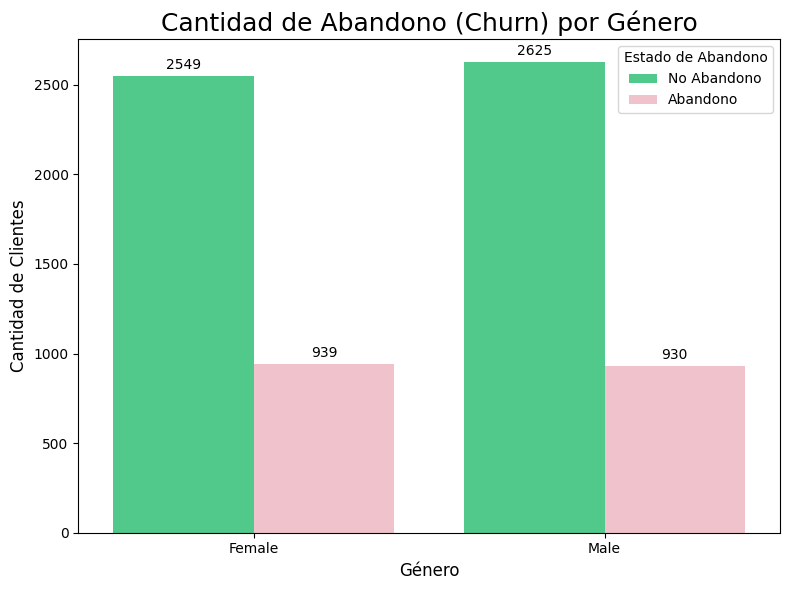

In [35]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Genero', hue='Abandono', palette={0: '#3DDD8A', 1: '#F8BBC7'})

plt.title('Cantidad de Abandono (Churn) por Género', fontsize=18)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Abandono', 'Abandono'], title='Estado de Abandono')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.savefig('abandono_por_genero.png')
print('Gráfico de barras "abandono_por_genero.png" generado con éxito, con cantidades en las barras.')

Gráfico de barras "abandono_por_adulto_mayor.png" generado con éxito.


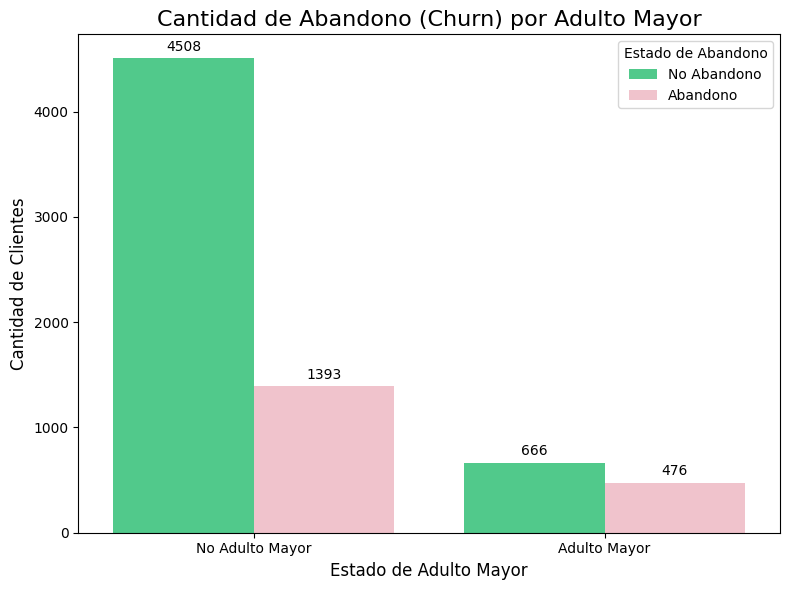

In [36]:
df['Adulto_Mayor_Etiqueta'] = df['Adulto_Mayor'].map({0: 'No Adulto Mayor', 1: 'Adulto Mayor'})

colores_churn = {0: '#3DDD8A', 1: '#F8BBC7'}

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Adulto_Mayor_Etiqueta', hue='Abandono', palette=colores_churn)

plt.title('Cantidad de Abandono (Churn) por Adulto Mayor', fontsize=16)
plt.xlabel('Estado de Adulto Mayor', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Abandono', 'Abandono'], title='Estado de Abandono')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.savefig('abandono_por_adulto_mayor.png')
print('Gráfico de barras "abandono_por_adulto_mayor.png" generado con éxito.')

Gráfico de barras "abandono_por_pareja.png" generado con éxito.


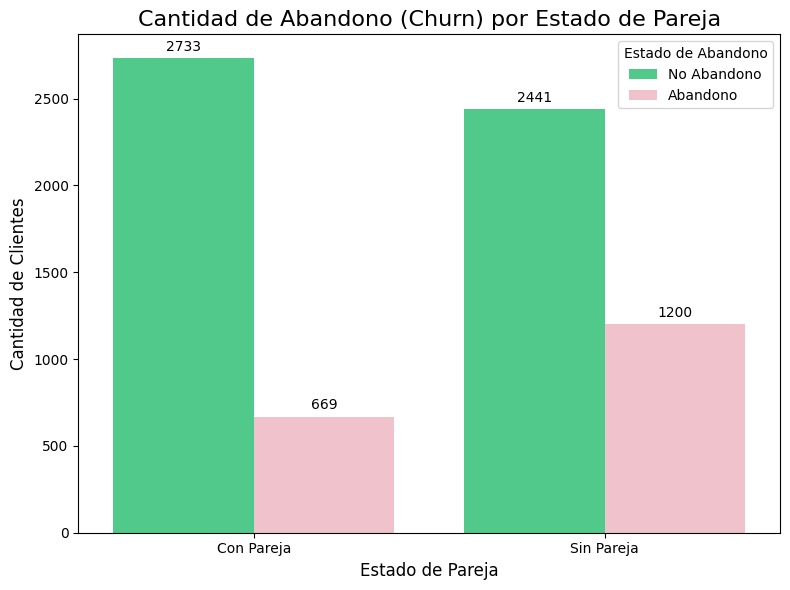

In [37]:
df['Pareja_Label'] = df['Pareja'].map({0: 'Sin Pareja', 1: 'Con Pareja'})

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Pareja_Label', hue='Abandono', palette=colores_churn)

plt.title('Cantidad de Abandono (Churn) por Estado de Pareja', fontsize=16)
plt.xlabel('Estado de Pareja', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Abandono', 'Abandono'], title='Estado de Abandono')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.savefig('abandono_por_pareja.png')
print('Gráfico de barras "abandono_por_pareja.png" generado con éxito.')

Gráfico de barras "abandono_por_dependientes.png" generado con éxito.


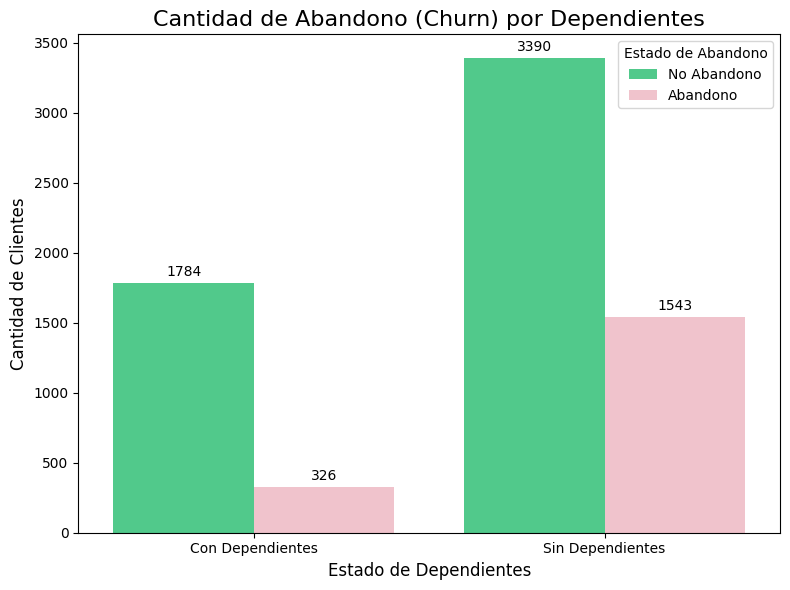

In [38]:
df['Dependientes_Label'] = df['Dependientes'].map({0: 'Sin Dependientes', 1: 'Con Dependientes'})

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Dependientes_Label', hue='Abandono', palette=colores_churn)

plt.title('Cantidad de Abandono (Churn) por Dependientes', fontsize=16)
plt.xlabel('Estado de Dependientes', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Abandono', 'Abandono'], title='Estado de Abandono')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.savefig('abandono_por_dependientes.png')
print('Gráfico de barras "abandono_por_dependientes.png" generado con éxito.')

Gráfico de barras agrupadas "abandono_vs_antiguedad.png" generado con éxito.


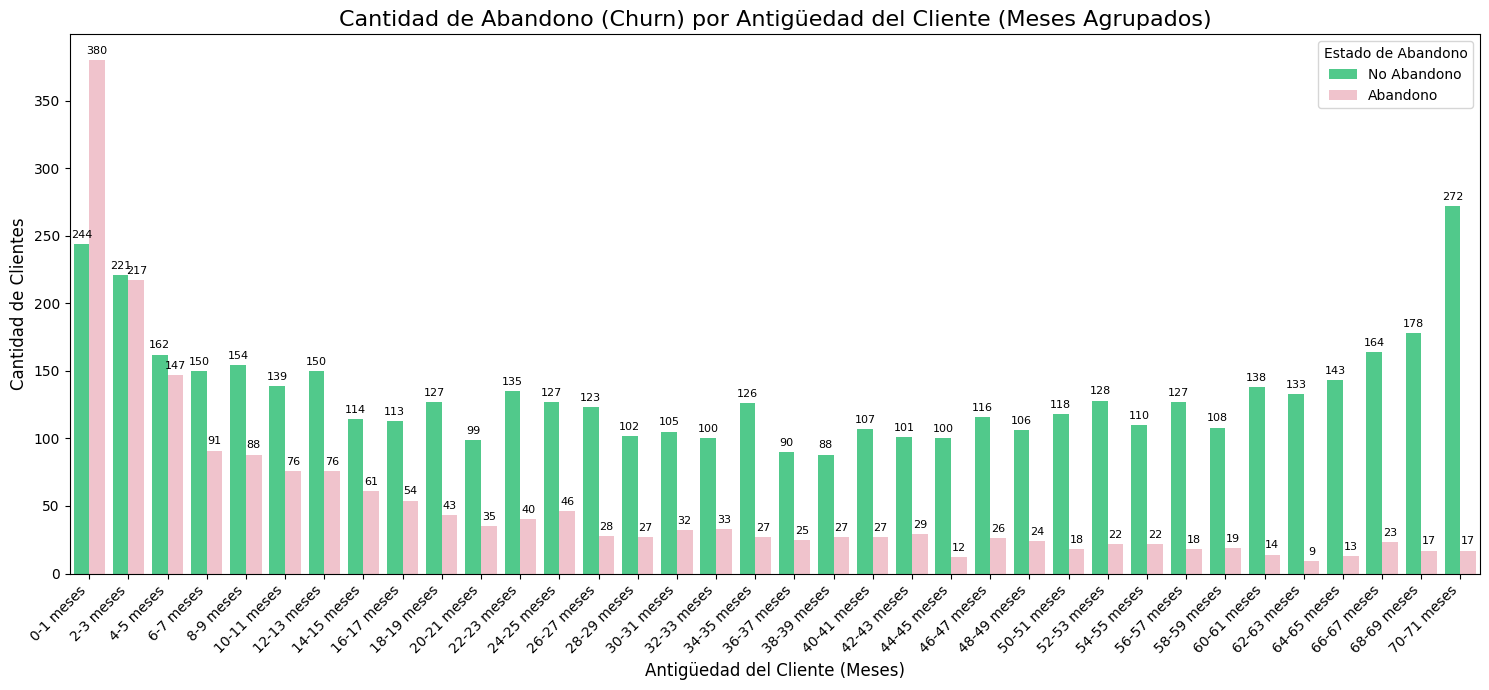

In [39]:
bins = list(range(0, 74, 2))
labels = [f'{i}-{i+1} meses' for i in range(0, 72, 2)]

df['Antiguedad_Binned'] = pd.cut(df['Antiguedad_Meses'], bins=bins, labels=labels, right=False, include_lowest=True)

plt.figure(figsize=(15, 7))
ax = sns.countplot(data=df, x='Antiguedad_Binned', hue='Abandono', palette=colores_churn, order=labels)

plt.title('Cantidad de Abandono (Churn) por Antigüedad del Cliente (Meses Agrupados)', fontsize=16)
plt.xlabel('Antigüedad del Cliente (Meses)', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')

handles, labels_orig = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Abandono', 'Abandono'], title='Estado de Abandono')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=8) # Adjusted fontsize for counts

plt.tight_layout()
plt.savefig('abandono_vs_antiguedad.png')
print('Gráfico de barras agrupadas "abandono_vs_antiguedad.png" generado con éxito.')

Gráfico de línea "tasa_abandono.png" generado con éxito.


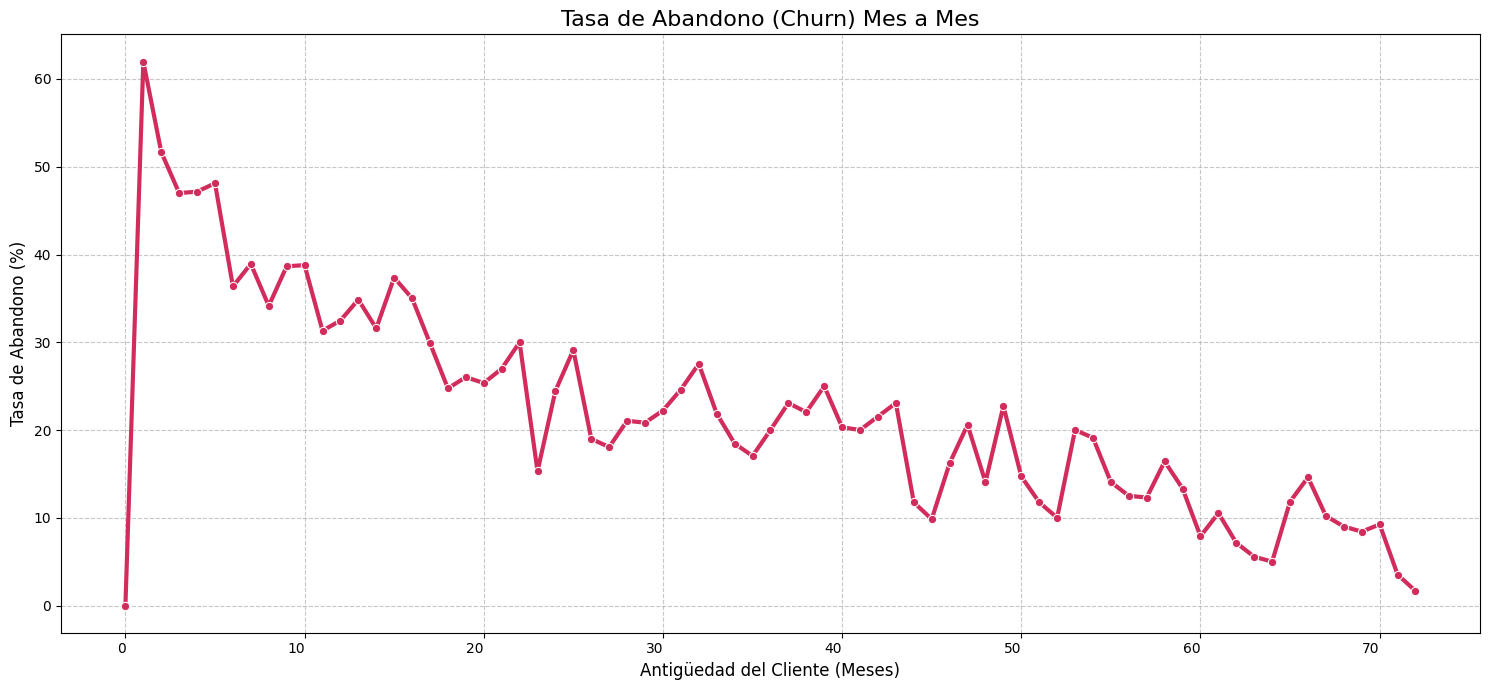

In [40]:
churn_rate_by_month = df.groupby('Antiguedad_Meses')['Abandono'].mean().reset_index()
churn_rate_by_month['Tasa_Abandono_Porcentaje'] = churn_rate_by_month['Abandono'] * 100

color_churn_line = '#D22C5C'

plt.figure(figsize=(15, 7))
ax = sns.lineplot(data=churn_rate_by_month, x='Antiguedad_Meses', y='Tasa_Abandono_Porcentaje', color=color_churn_line, marker='o', linewidth=3)

plt.title('Tasa de Abandono (Churn) Mes a Mes', fontsize=16)
plt.xlabel('Antigüedad del Cliente (Meses)', fontsize=12)
plt.ylabel('Tasa de Abandono (%)', fontsize=12)
plt.xticks(ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('tasa_abandono.png')
print('Gráfico de línea "tasa_abandono.png" generado con éxito.')

Gráfico de barras "abandono_por_servicio_telefonico.png" generado con éxito.


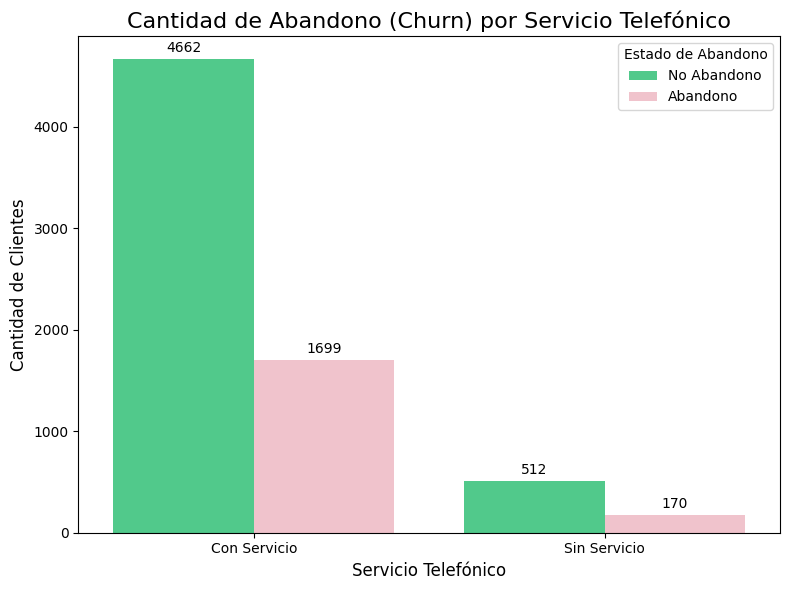

In [41]:
df['Servicio_Telefonico_Label'] = df['Servicio_Telefonico'].map({0: 'Sin Servicio', 1: 'Con Servicio'})

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Servicio_Telefonico_Label', hue='Abandono', palette=colores_churn)

plt.title('Cantidad de Abandono (Churn) por Servicio Telefónico', fontsize=16)
plt.xlabel('Servicio Telefónico', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

handles, labels_orig = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Abandono', 'Abandono'], title='Estado de Abandono')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.savefig('abandono_por_servicio_telefonico.png')
print('Gráfico de barras "abandono_por_servicio_telefonico.png" generado con éxito.')

Gráfico de barras "abandono_por_servicio_internet.png" generado con éxito.


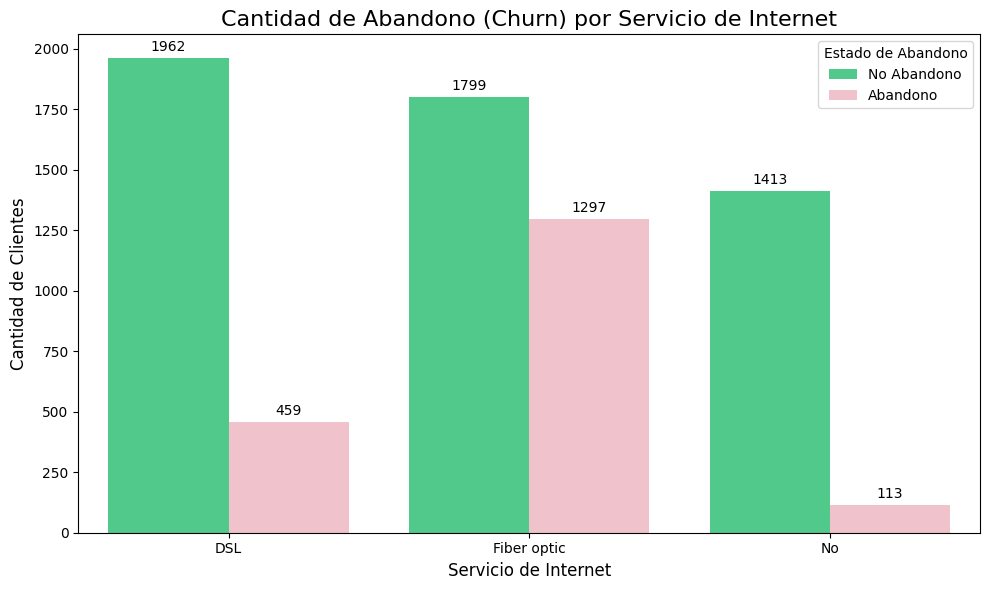

In [42]:
df['Abandono_Label'] = df['Abandono'].map({0: 'No Abandono', 1: 'Abandono'})

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Servicio_Internet', hue='Abandono', palette=colores_churn)

plt.title('Cantidad de Abandono (Churn) por Servicio de Internet', fontsize=16)
plt.xlabel('Servicio de Internet', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Abandono', 'Abandono'], title='Estado de Abandono')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.savefig('abandono_por_servicio_internet.png')
print('Gráfico de barras "abandono_por_servicio_internet.png" generado con éxito.')

Gráfico de barras "abandono_por_streaming_tv.png" generado con éxito.


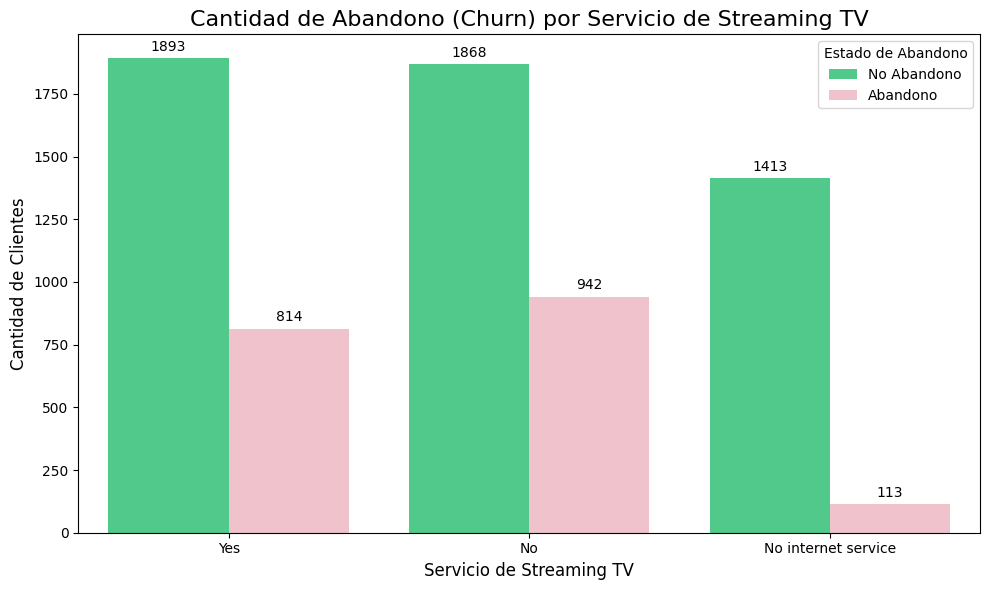

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Streaming_TV', hue='Abandono', palette=colores_churn)

plt.title('Cantidad de Abandono (Churn) por Servicio de Streaming TV', fontsize=16)
plt.xlabel('Servicio de Streaming TV', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Abandono', 'Abandono'], title='Estado de Abandono')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.savefig('abandono_por_streaming_tv.png')
print('Gráfico de barras "abandono_por_streaming_tv.png" generado con éxito.')

Gráfico de barras "abandono_por_streaming_peliculas.png" generado con éxito.


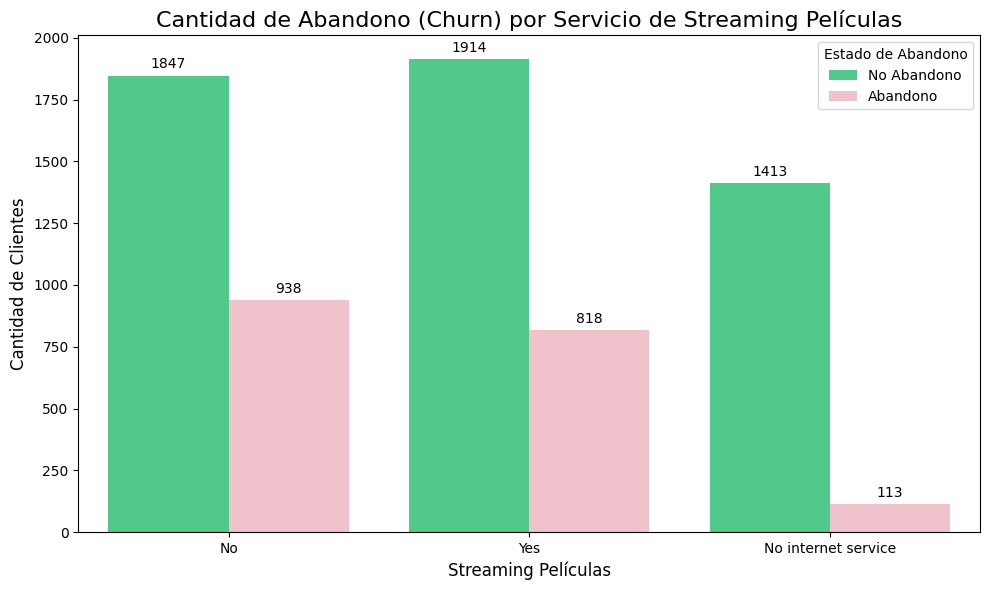

In [44]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Streaming_Peliculas', hue='Abandono', palette=colores_churn)

plt.title('Cantidad de Abandono (Churn) por Servicio de Streaming Películas', fontsize=16)
plt.xlabel('Streaming Películas', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Abandono', 'Abandono'], title='Estado de Abandono')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.savefig('abandono_por_streaming_peliculas.png')
print('Gráfico de barras "abandono_por_streaming_peliculas.png" generado con éxito.')

Gráfico de barras "abandono_por_contrato.png" generado con éxito.


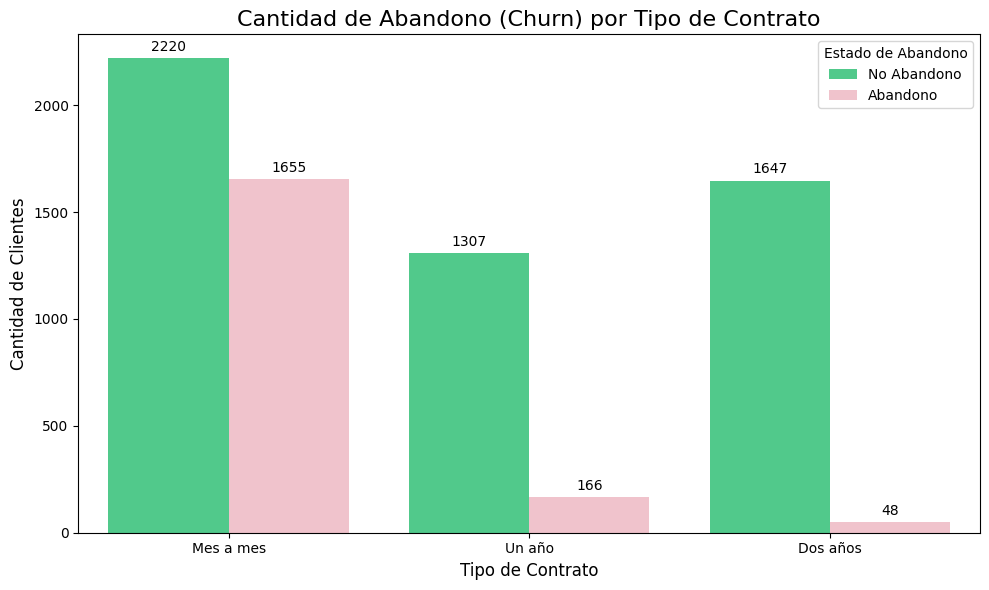

In [45]:
contract_labels_map = {
    'Month-to-month': 'Mes a mes',
    'One year': 'Un año',
    'Two year': 'Dos años'
}
df['Contrato_Label'] = df['Contrato'].map(contract_labels_map)

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Contrato_Label', hue='Abandono', palette=colores_churn, order=['Mes a mes', 'Un año', 'Dos años'])

plt.title('Cantidad de Abandono (Churn) por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Abandono', 'Abandono'], title='Estado de Abandono')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.savefig('abandono_por_contrato.png')
print('Gráfico de barras "abandono_por_contrato.png" generado con éxito.')

Gráfico de barras "abandono_por_metodo_pago.png" generado con éxito.


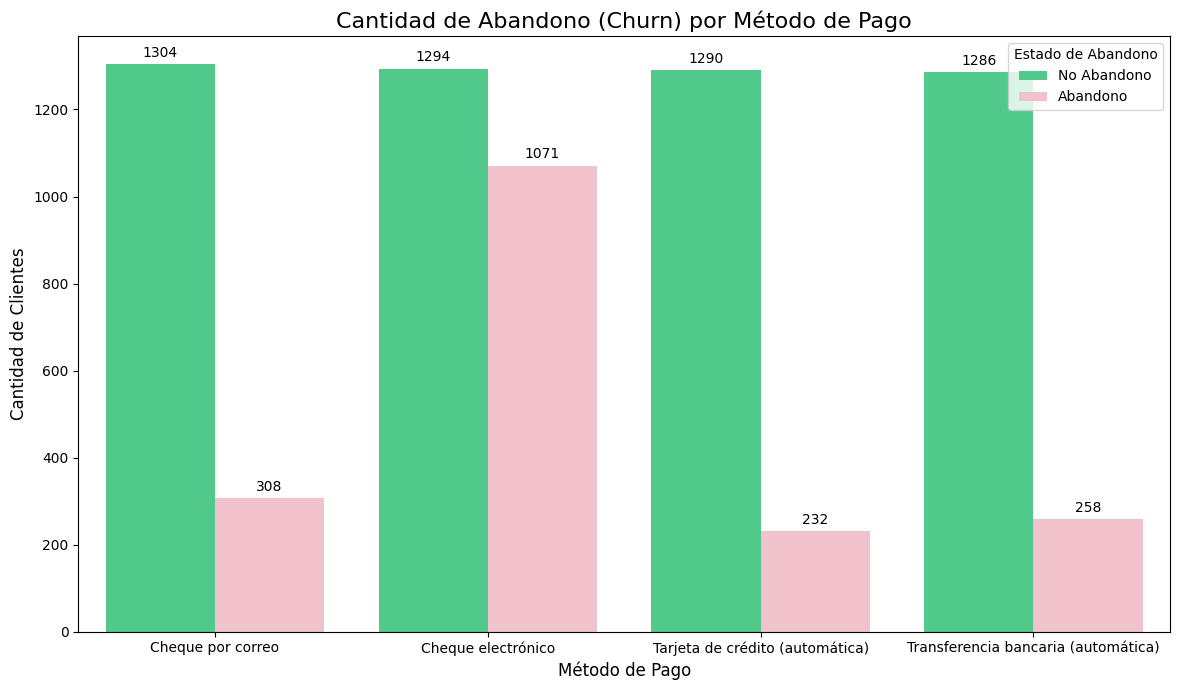

In [46]:
metodo_pago_mapping = {
    'Mailed check': 'Cheque por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automática)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
}
df['Metodo_Pago_Label'] = df['Metodo_Pago'].map(metodo_pago_mapping)

plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df, x='Metodo_Pago_Label', hue='Abandono', palette=colores_churn)

plt.title('Cantidad de Abandono (Churn) por Método de Pago', fontsize=16)
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Abandono', 'Abandono'], title='Estado de Abandono')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.savefig('abandono_por_metodo_pago.png')
print('Gráfico de barras "abandono_por_metodo_pago.png" generado con éxito.')

/tmp/ipython-input-3721530625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Abandono_Label', y='Cargos_Mensuales', palette=colores_churn_etiquetas)


Gráfico de cajas "abandono_vs_cargos_mensuales.png" generado con éxito.


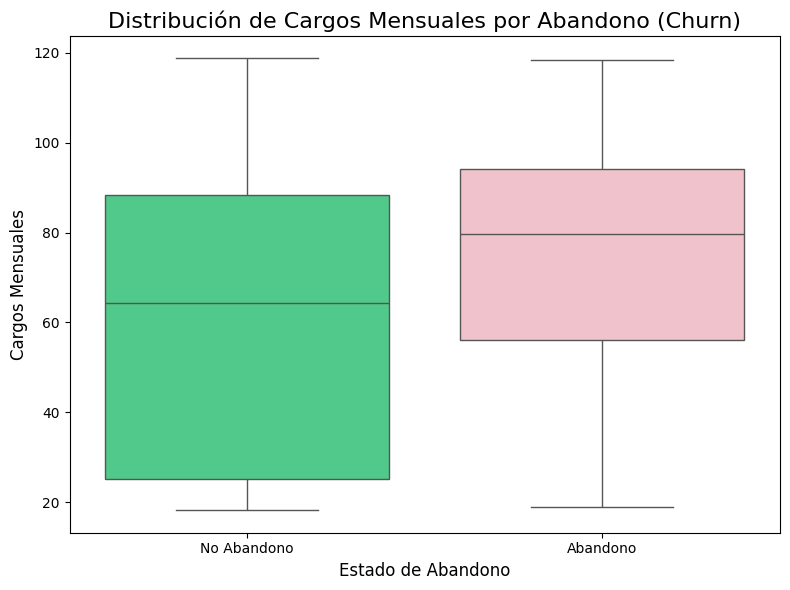

In [47]:
df['Abandono_Label'] = df['Abandono'].map({0: 'No Abandono', 1: 'Abandono'})

colores_churn_etiquetas = {'No Abandono': '#3DDD8A', 'Abandono': '#F8BBC7'}

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Abandono_Label', y='Cargos_Mensuales', palette=colores_churn_etiquetas)

plt.title('Distribución de Cargos Mensuales por Abandono (Churn)', fontsize=16)
plt.xlabel('Estado de Abandono', fontsize=12)
plt.ylabel('Cargos Mensuales', fontsize=12)

plt.tight_layout()
plt.savefig('abandono_vs_cargos_mensuales.png')
print('Gráfico de cajas "abandono_vs_cargos_mensuales.png" generado con éxito.')

Gráfico de dispersión "abandono_cargos_antiguedad.png" generado con éxito.


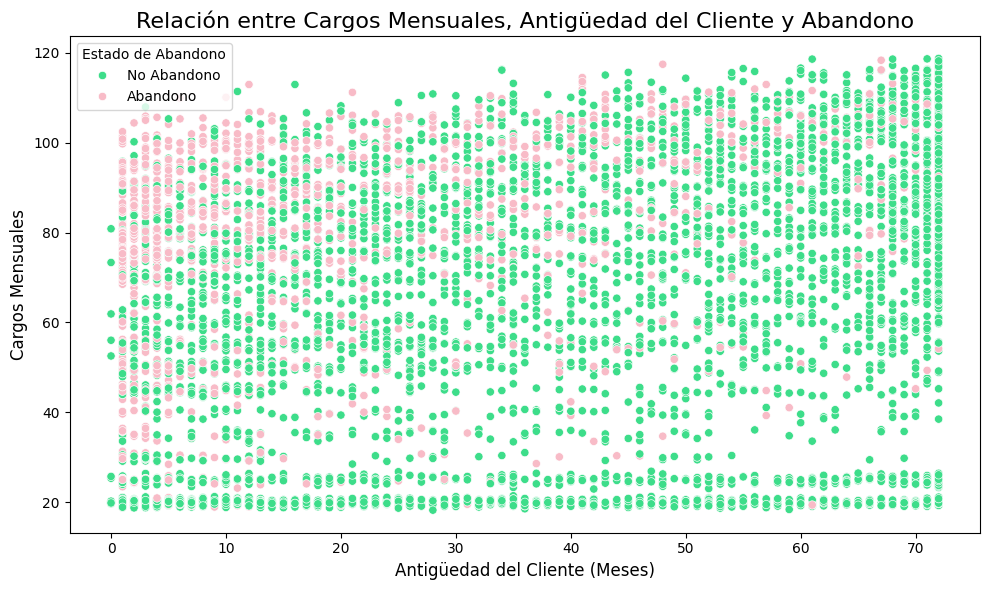

In [48]:
df['Abandono_Label'] = df['Abandono'].map({0: 'No Abandono', 1: 'Abandono'})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Antiguedad_Meses', y='Cargos_Mensuales', hue='Abandono_Label', palette=colores_churn_etiquetas)

plt.title('Relación entre Cargos Mensuales, Antigüedad del Cliente y Abandono', fontsize=16)
plt.xlabel('Antigüedad del Cliente (Meses)', fontsize=12)
plt.ylabel('Cargos Mensuales', fontsize=12)

plt.legend(title='Estado de Abandono')

plt.tight_layout()
plt.savefig('abandono_cargos_antiguedad.png')
print('Gráfico de dispersión "abandono_cargos_antiguedad.png" generado con éxito.')

Gráfico de matriz de correlación "matriz_correlacion.png" generado con éxito.


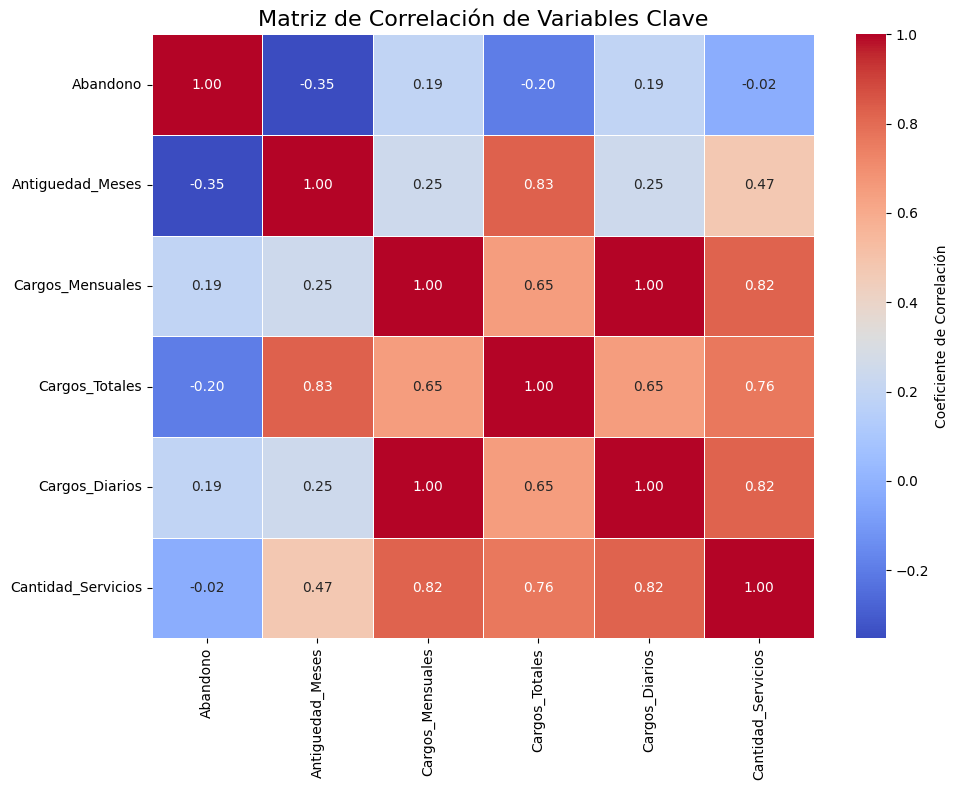

In [49]:
service_cols = [
    'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online',
    'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
    'Streaming_TV', 'Streaming_Peliculas'
]

service_mapping = {'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0, 'Fiber optic': 1, 'DSL': 1}
for col in service_cols:
    df[col] = df[col].map(service_mapping)

df['Cantidad_Servicios'] = df[service_cols].sum(axis=1)

numerical_cols = [
    'Abandono', 'Antiguedad_Meses', 'Cargos_Mensuales', 'Cargos_Totales',
    'Cargos_Diarios', 'Cantidad_Servicios'
]
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Matriz de Correlación de Variables Clave', fontsize=16)
plt.tight_layout()
plt.savefig('matriz_correlacion.png')
print('Gráfico de matriz de correlación "matriz_correlacion.png" generado con éxito.')

#📄Informe final

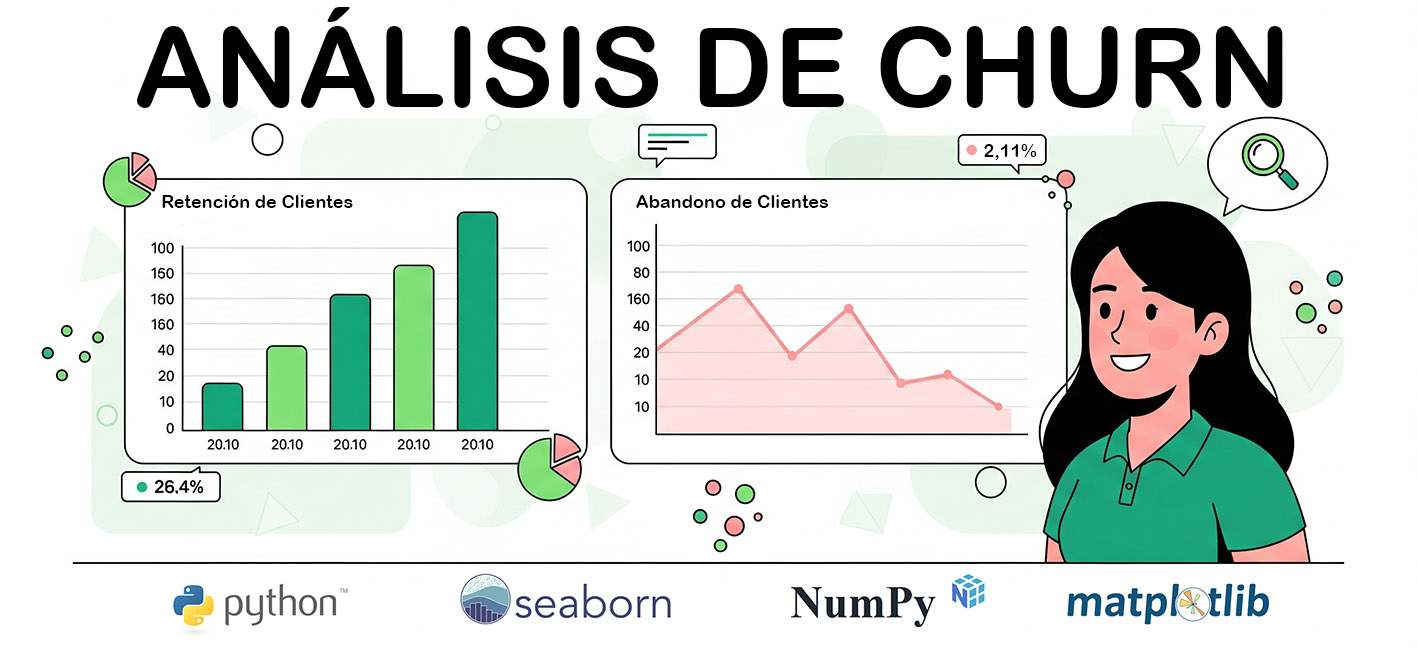

### **Introducción**

El presente informe detalla un análisis integral de los datos de la compañía telefónica TelecomX con el objetivo de comprender y mitigar la evasión de clientes, o Churn. El análisis exploratorio de los datos se enfoca en identificar patrones, correlaciones y los principales factores que influyen en la decisión de un cliente de abandonar el servicio. El resultado es un conjunto de conclusiones claras y recomendaciones estratégicas respaldadas por visualizaciones de datos.

### **Limpieza y Tratamiento de Datos**

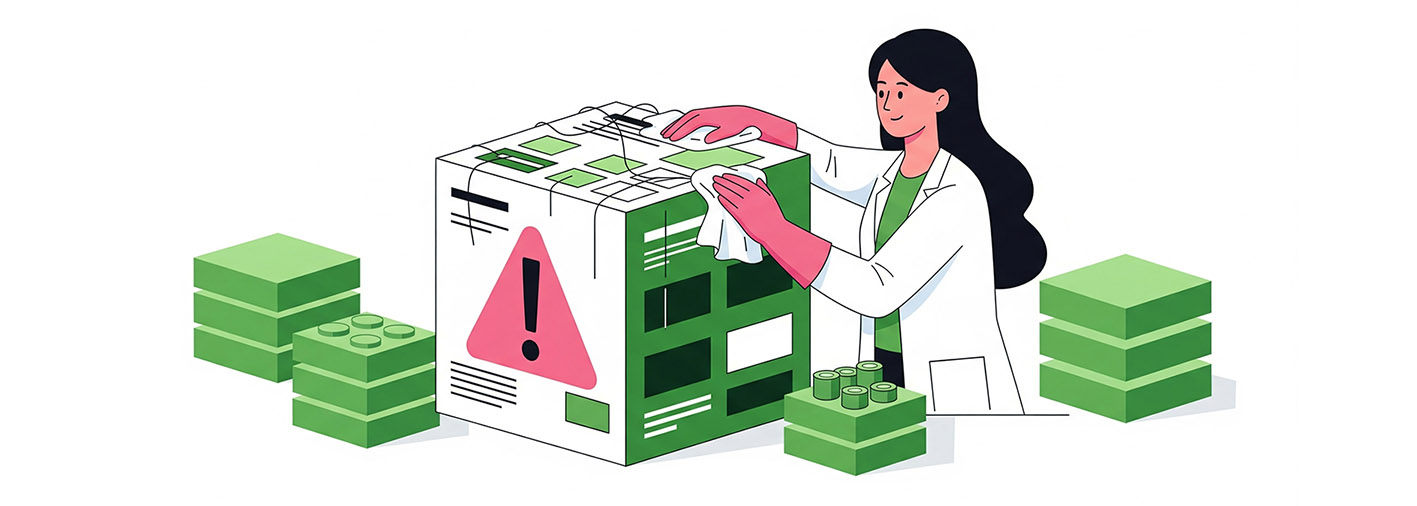

Antes del análisis, se realizó una serie de pasos para limpiar y estandarizar los datos:

* Aplanamiento de Datos: Las columnas anidadas (`account`, `customer`, `phone` e `internet`) fueron separadas en columnas individuales con nombres claros.

* Identificación y Manejo de Inconsistencias: Se detectaron y corrigieron inconsistencias en la columna `account.Charges`.Total donde los clientes nuevos (`tenure` de 0) tenían un espacio vacío (" "), los cuales fueron reemplazados por 0.0.

* Conversión de Tipos: Se transformó la columna `account.Charges.Total` a un tipo numérico (float64).

* Conversión a Binario: Las columnas con valores de texto Yes y No (como `Churn`, `customer.Partner` y `PaperlessBilling`) fueron convertidas a valores binarios 1 y 0 respectivamente, lo que facilita el análisis cuantitativo.

* Renombrado de Columnas: Todos los nombres de las columnas fueron traducidos al español (ej. `Churn` a `Abandono`, `tenure` a `Antiguedad_Meses`) para una mejor comprensión.

* Ingeniería de Características: Se crearon nuevas variables como `Cargos_Diarios` y `Cantidad_Servicios` para un análisis de correlación más profundo.

### **Análisis Exploratorio de Datos**

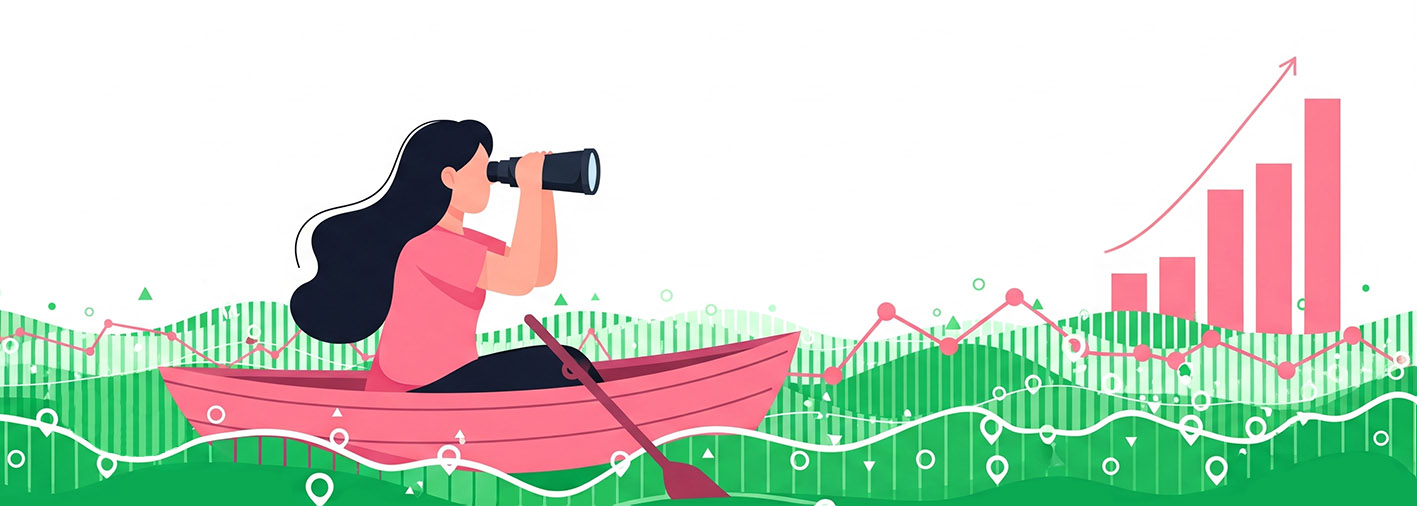

Se generaron diversas visualizaciones para explorar las relaciones entre las variables y el abandono de clientes.

* **Distribución de Abandono**:

La tasa general de abandono es del 26.5%, lo que indica que una porción considerable de los clientes no permanece en la compañía a largo plazo.


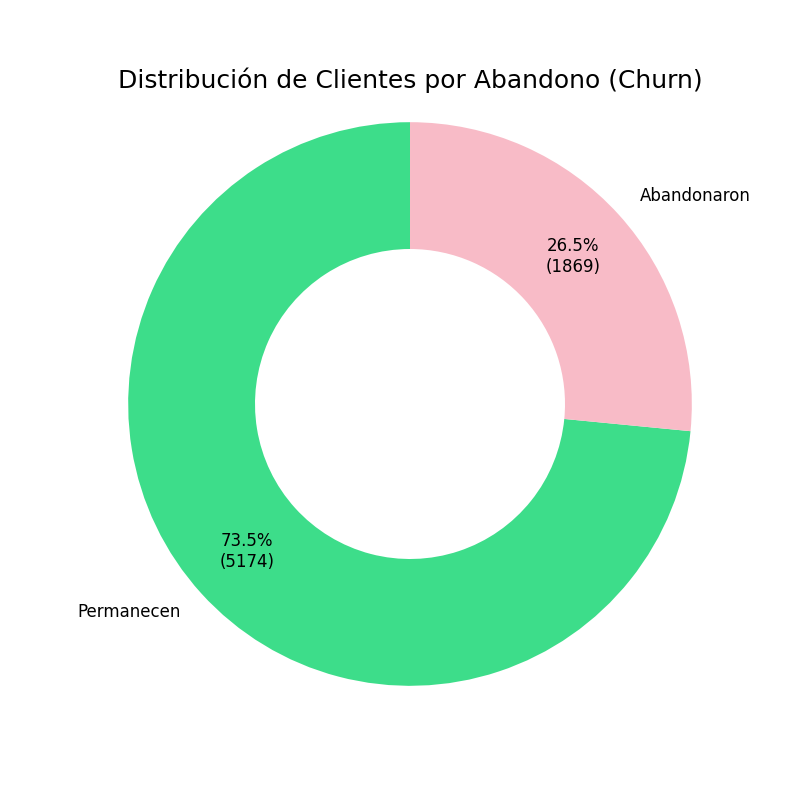


* **Antigüedad del Cliente vs. Abandono**:

Existe una fuerte relación entre la antigüedad y el abandono. El gráfico de línea mes a mes revela que la tasa de abandono es extremadamente alta en el primer mes de servicio, con un pico de casi 60, y disminuye drásticamente con cada mes adicional que el cliente permanece. Esto subraya un problema crítico de retención temprana.



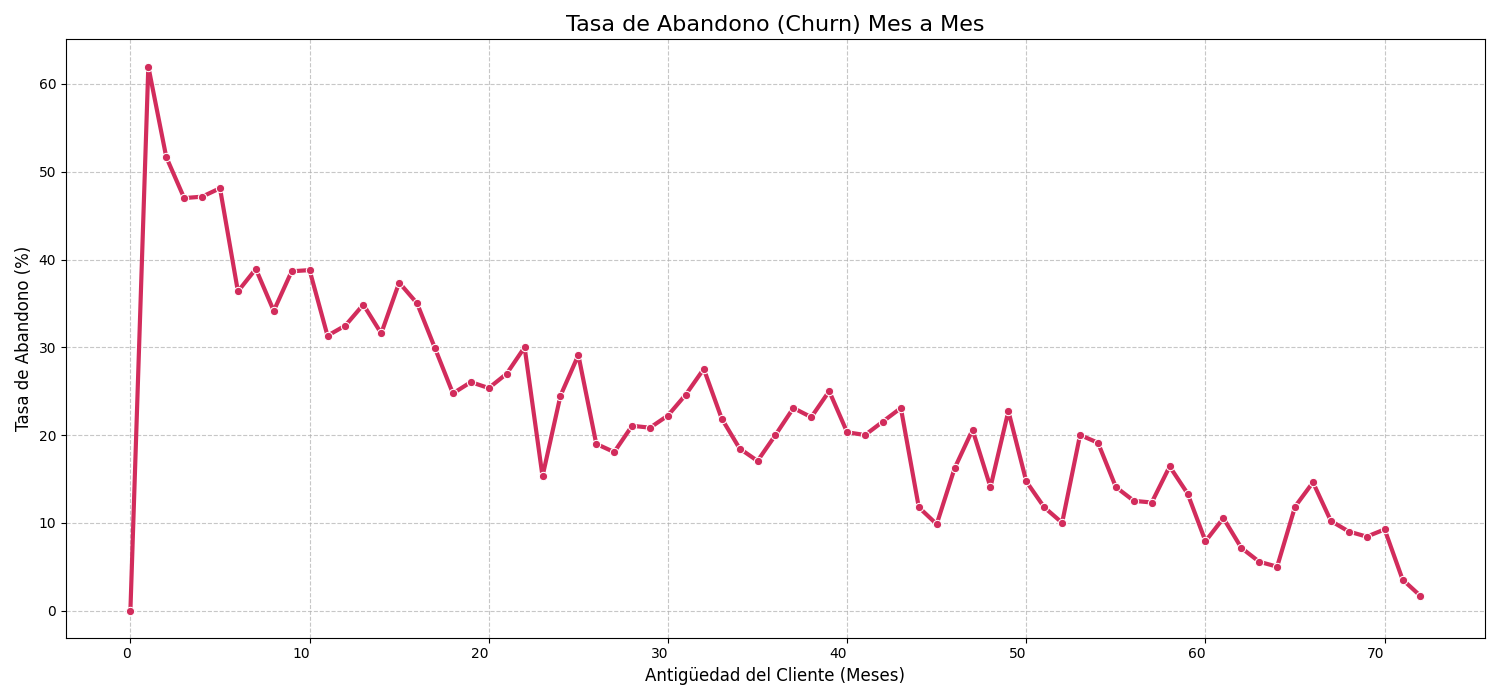

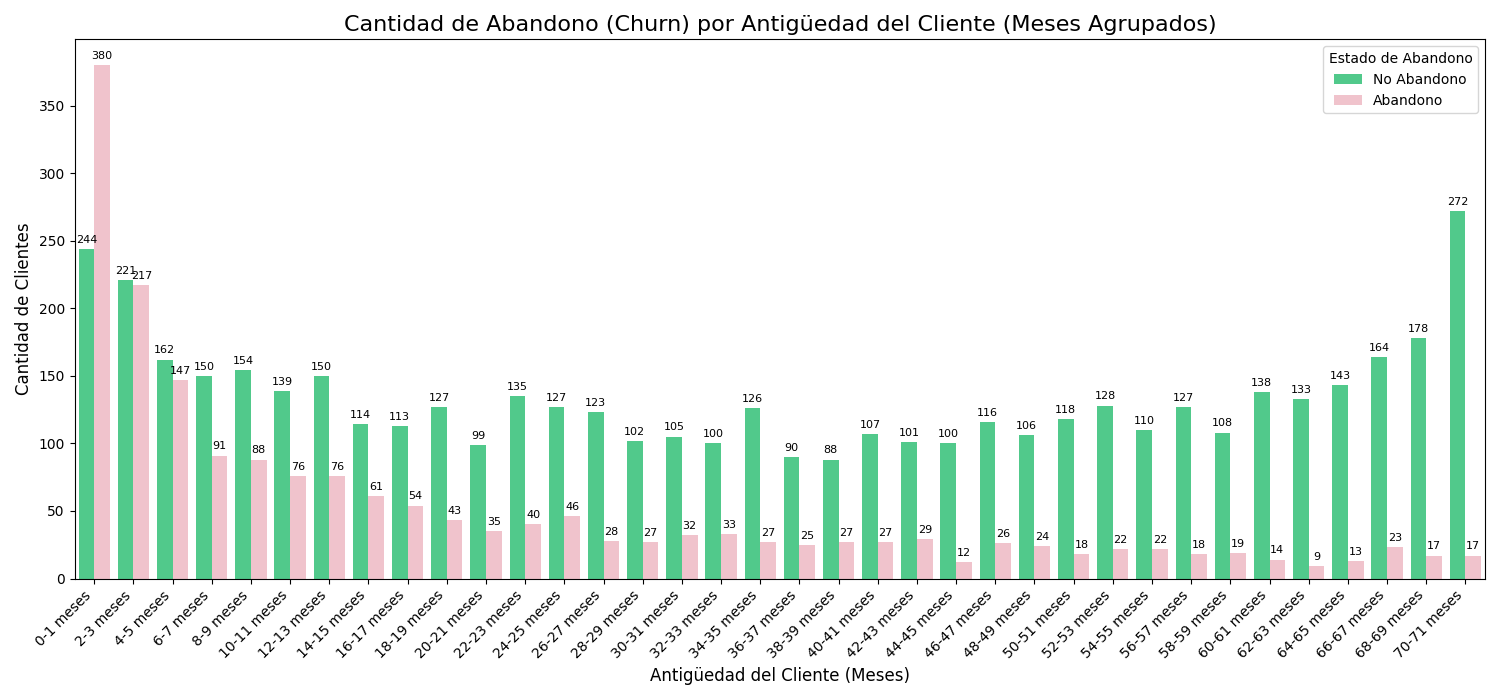

* **Contrato vs. Abandono**:

El tipo de contrato es un factor decisivo. Los clientes con contratos "Mes a mes" tienen la mayor cantidad de abandonos, mientras que los contratos a Dos años muestran una tasa de abandono muy baja, lo que sugiere una mayor estabilidad y satisfacción.

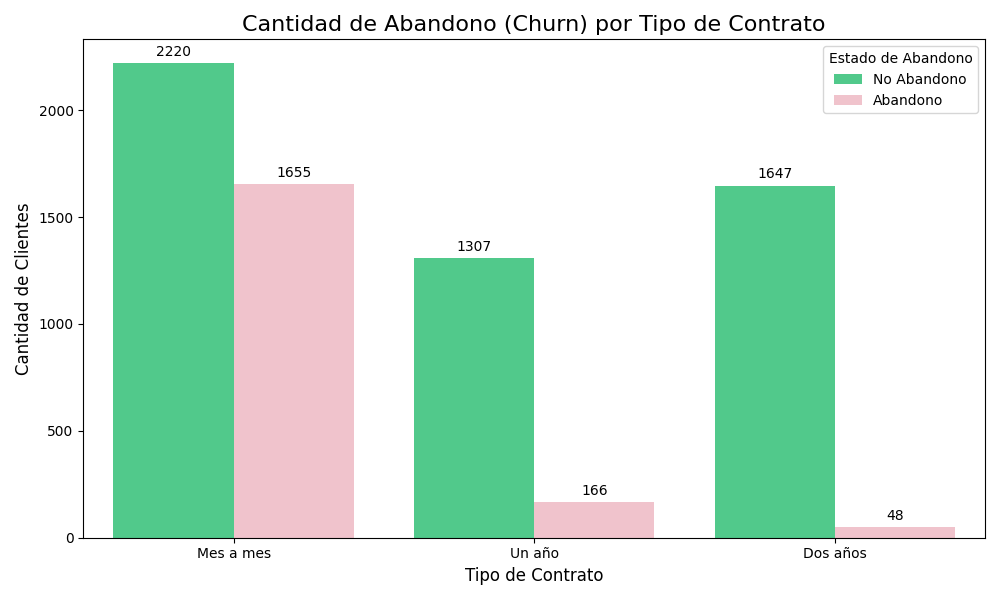

* **Servicios vs. Abandono**:

El tipo de servicio de Internet está fuertemente asociado con el abandono. Los clientes con "Fibra óptica" tienen una tasa de abandono notablemente más alta que los de "DSL" o aquellos sin servicio de internet.

El número total de servicios por sí mismo tiene una correlación casi nula con el abandono, lo que sugiere que el problema no es la cantidad de servicios, sino la naturaleza de los mismos.

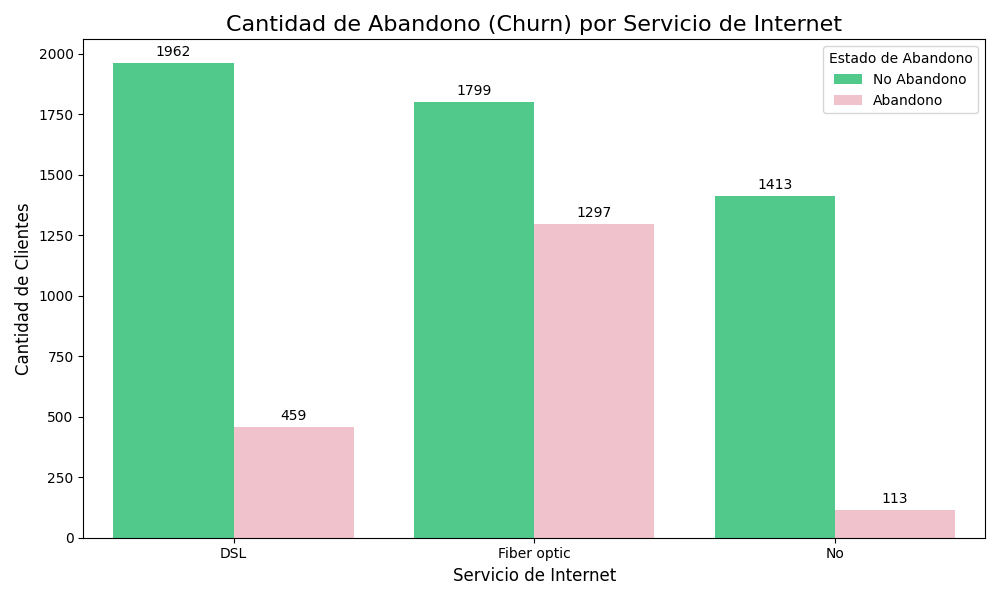

* **Cargos y Abandono**:

El gráfico de cajas de Cargos_Mensuales vs. Abandono demuestra que los clientes que abandonan tienen cargos mensuales significativamente más altos.

El gráfico de dispersión, que combina Cargos_Mensuales y Antiguedad_Meses, resalta un clúster de clientes que abandonaron con baja antigüedad y cargos mensuales elevados, reforzando la idea de que la percepción de alto costo en las etapas iniciales es un motor de evasión.

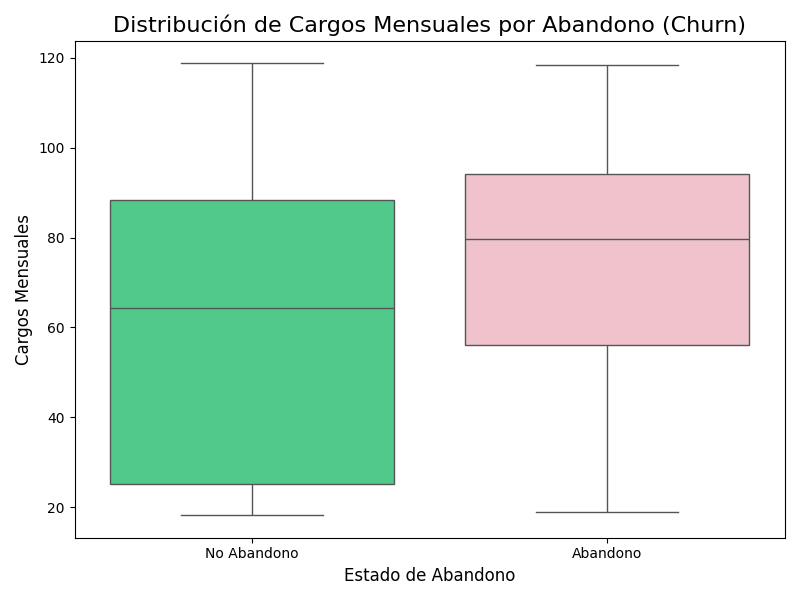

### **Conclusiones e Insights**

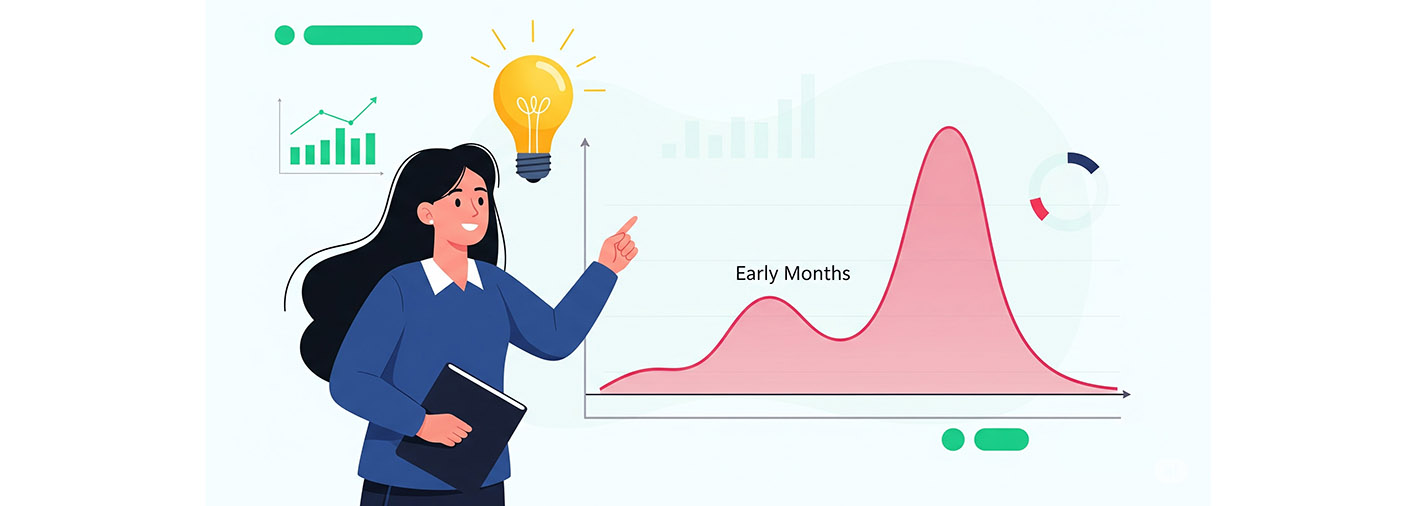

1. **Vulnerabilidad Temprana**: La mayor parte del abandono ocurre en los primeros meses del servicio. La compañía es ineficaz en la retención de nuevos clientes.

2. **Riesgo en la Flexibilidad**: El contrato Mes a mes es un indicador de alto riesgo, ya que los clientes en esta modalidad son los más propensos a la evasión.

3. **Fibra Óptica bajo Escrutinio**: A pesar de ser un servicio premium, la Fibra Óptica presenta una correlación positiva con el abandono, lo que sugiere problemas subyacentes con su calidad, soporte o valor percibido.

4. **Sensibilidad al Precio**: Los clientes con mayores facturas mensuales son más propensos a irse, lo que indica una posible desconexión entre el costo y el valor que perciben.

### **Recomendaciones**

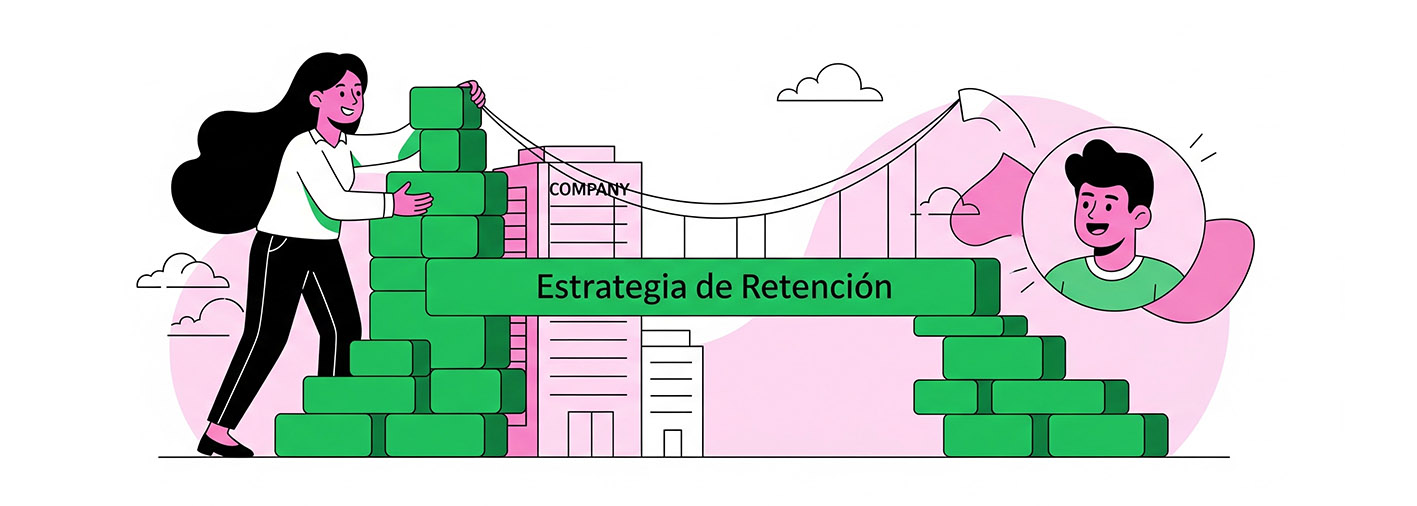

* **Programa de Retención para Nuevos Clientes**: Desarrollar un programa de onboarding personalizado que incluya seguimientos proactivos, soporte técnico dedicado en los primeros meses y descuentos exclusivos para clientes nuevos.

* **Estrategias para Contratos a Largo Plazo**: Crear ofertas atractivas para incentivar la migración de clientes de contratos Mes a mes a planes de Un año o Dos años, como descuentos significativos o beneficios adicionales (ej. servicios de streaming gratuitos).

* **Mejora del Servicio de Fibra Óptica**: Investigar las causas detrás del alto abandono de clientes de Fibra Óptica. Se recomienda realizar encuestas de satisfacción, monitorear la calidad del servicio y fortalecer el soporte técnico para este segmento.

* **Revisión de la Estructura de Precios**: Analizar la relación entre los Cargos_Mensuales y los servicios ofrecidos. Considerar la posibilidad de planes más flexibles o la inclusión de beneficios adicionales en los planes más caros para justificar el costo y aumentar el valor percibido.